<a href="https://colab.research.google.com/github/macabdul9/generative-adversarial-network/blob/master/gan_fashio_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist
from keras.layers import*

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.optimizers import Adam

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(X_Train,_), (_,_) = fashion_mnist.load_data()

In [11]:
print(X_Train.shape)

(60000, 28, 28)


In [12]:
### normalize the data
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(X_Train.min(), X_Train.max())

-1.0 1.0


In [13]:
### flatten the data
X_Train = X_Train.reshape(-1, 28*28)
print(X_Train.shape)

(60000, 784)


In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
adam = Adam(lr = 2e-4, beta_1=0.5)

In [15]:
### generator

generator = Sequential()
generator.add(Dense(256, input_shape = (NOISE_DIM, )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))


W0717 22:31:58.883435 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 22:31:58.887115 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 22:31:58.892004 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:
generator.compile(loss = 'binary_crossentropy', optimizer = adam)

W0717 22:32:01.000070 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 22:32:01.013358 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0717 22:32:01.020767 140511221450624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [0]:
### discriminator

discriminator = Sequential()
discriminator.add(Dense(512, input_shape = (784, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam)

In [19]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
### combined model (Generator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape = (NOISE_DIM, ))
generator_output = generator(gan_input)

gan_output = discriminator(generator_output)

model = Model(gan_input, gan_output)

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [0]:
!mkdir images
!mkdir models

In [0]:
def showImage(epoch):
  noise = noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(-1, 28, 28)
  
  plt.figure(figsize=(10, 10))
  for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(generated_imgs[i], cmap = 'gray', interpolation = 'nearest')
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.savefig('images/gan_output{0}.png'.format(epoch + 1))
  

W0717 22:32:36.659329 140511221450624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Epochs 1 D loss 131.9408 G loss 258.6593


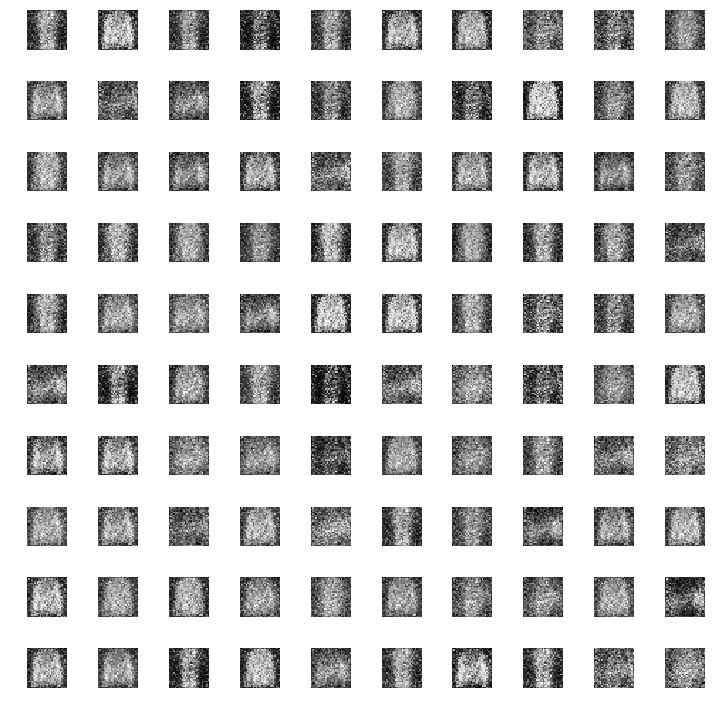

Epochs 2 D loss 144.6835 G loss 272.5842
Epochs 3 D loss 144.0439 G loss 273.8628
Epochs 4 D loss 148.7401 G loss 254.3672
Epochs 5 D loss 150.5470 G loss 244.5126
Epochs 6 D loss 153.4828 G loss 232.0958


<Figure size 432x288 with 0 Axes>

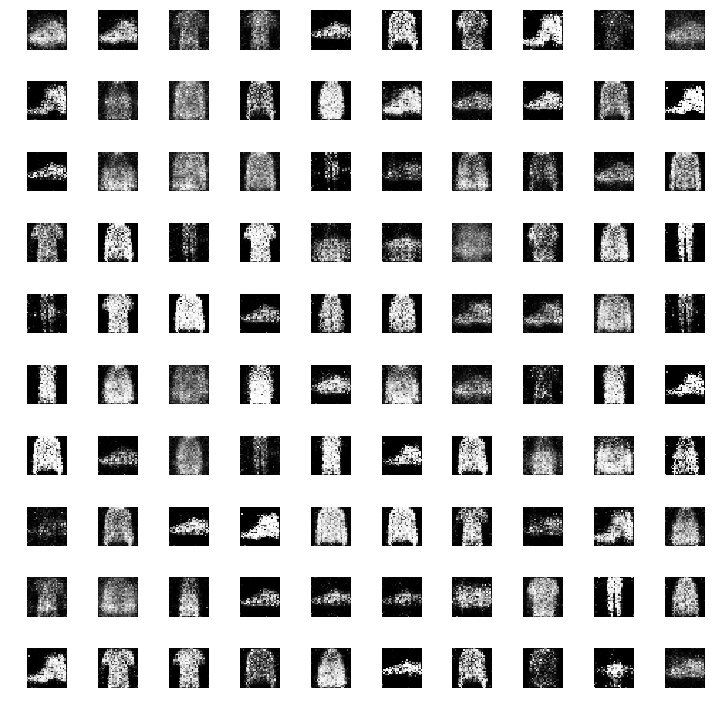

Epochs 7 D loss 156.2104 G loss 226.3310
Epochs 8 D loss 156.2800 G loss 225.0990
Epochs 9 D loss 156.1211 G loss 223.5564
Epochs 10 D loss 156.5855 G loss 223.5921
Epochs 11 D loss 156.1811 G loss 222.7687


<Figure size 432x288 with 0 Axes>

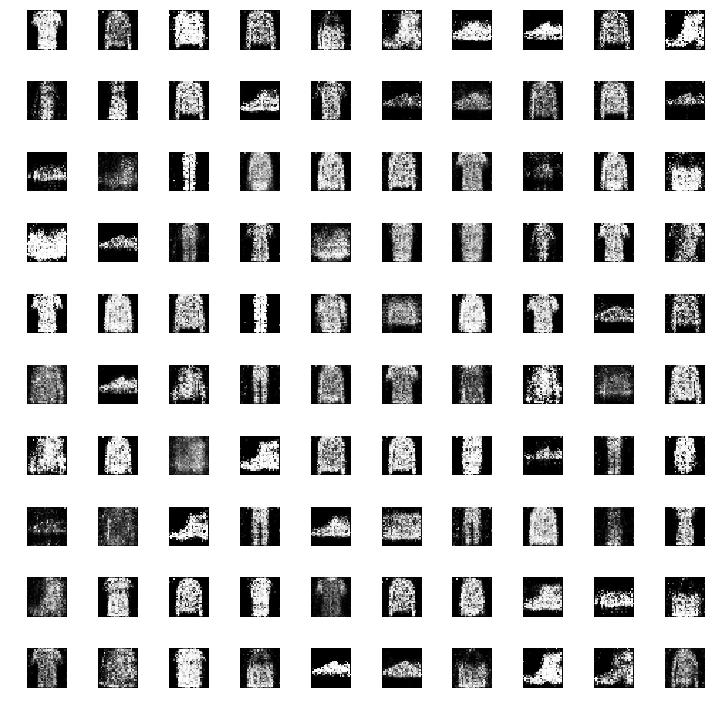

Epochs 12 D loss 156.7267 G loss 224.6367
Epochs 13 D loss 156.7559 G loss 225.0186
Epochs 14 D loss 157.7463 G loss 220.1562
Epochs 15 D loss 157.6506 G loss 219.8121
Epochs 16 D loss 157.9310 G loss 218.9440


<Figure size 432x288 with 0 Axes>

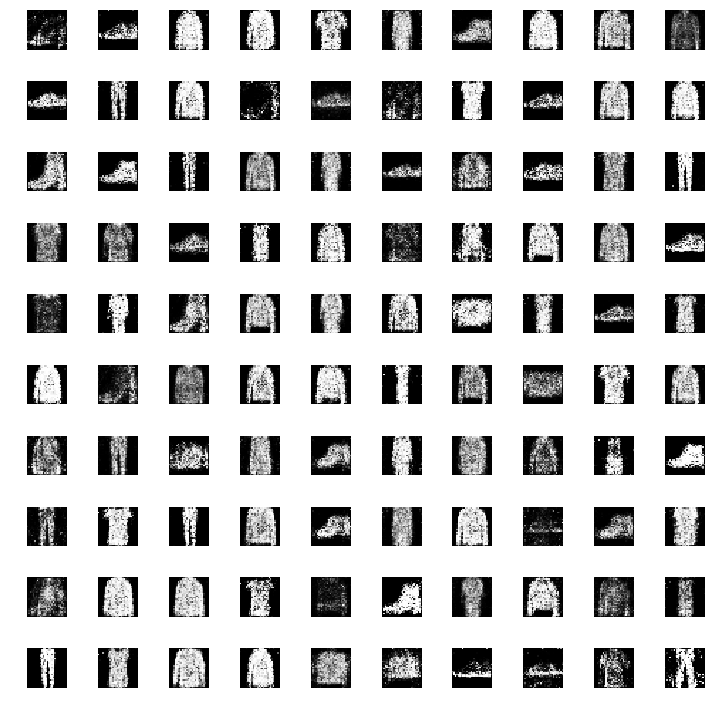

Epochs 17 D loss 158.3114 G loss 218.1599
Epochs 18 D loss 157.9279 G loss 219.7089
Epochs 19 D loss 158.3532 G loss 220.2282
Epochs 20 D loss 158.3911 G loss 217.3212
Epochs 21 D loss 158.8478 G loss 218.0473


<Figure size 432x288 with 0 Axes>

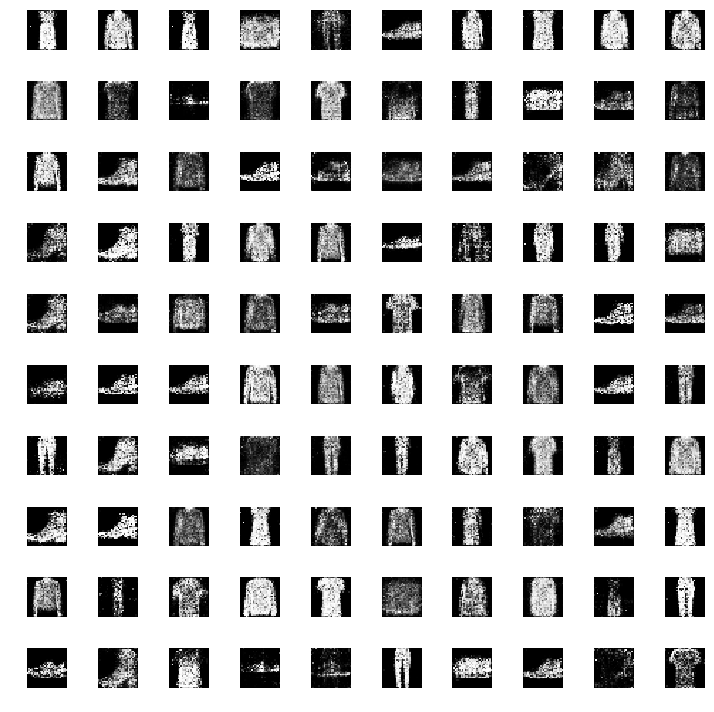

Epochs 22 D loss 159.0413 G loss 216.3783
Epochs 23 D loss 158.8397 G loss 215.5214
Epochs 24 D loss 159.3027 G loss 214.8737
Epochs 25 D loss 159.9019 G loss 213.8670
Epochs 26 D loss 159.9917 G loss 213.5977


<Figure size 432x288 with 0 Axes>

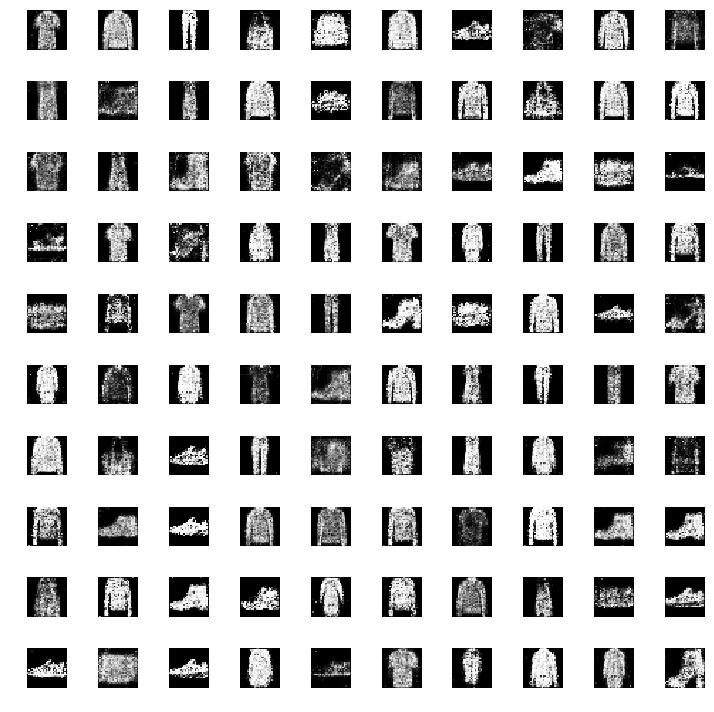

Epochs 27 D loss 159.8740 G loss 212.7750
Epochs 28 D loss 160.1746 G loss 212.8958
Epochs 29 D loss 160.3348 G loss 211.5841
Epochs 30 D loss 160.0091 G loss 213.0776
Epochs 31 D loss 160.4148 G loss 210.7733


<Figure size 432x288 with 0 Axes>

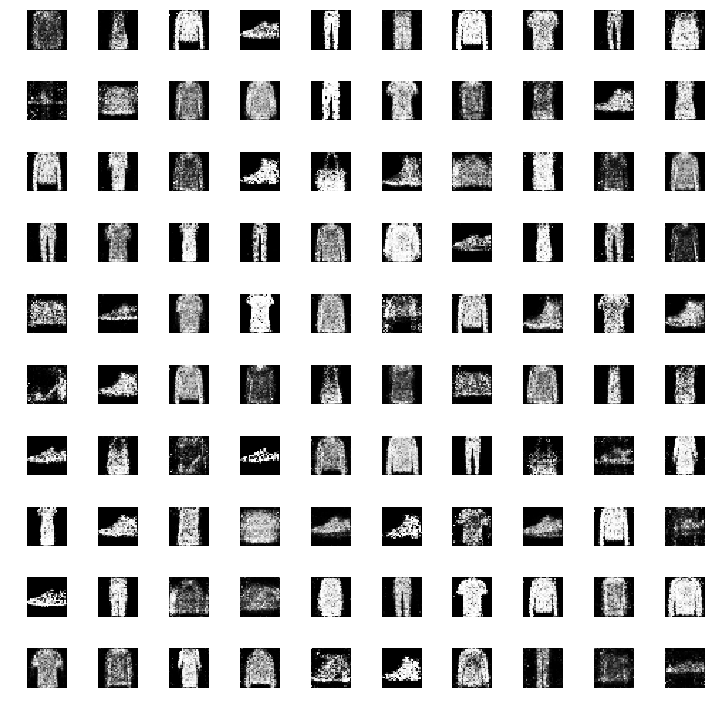

Epochs 32 D loss 160.2365 G loss 210.3119
Epochs 33 D loss 160.2339 G loss 211.3098
Epochs 34 D loss 159.9065 G loss 212.5217
Epochs 35 D loss 160.3214 G loss 210.4376
Epochs 36 D loss 160.0204 G loss 211.0340


<Figure size 432x288 with 0 Axes>

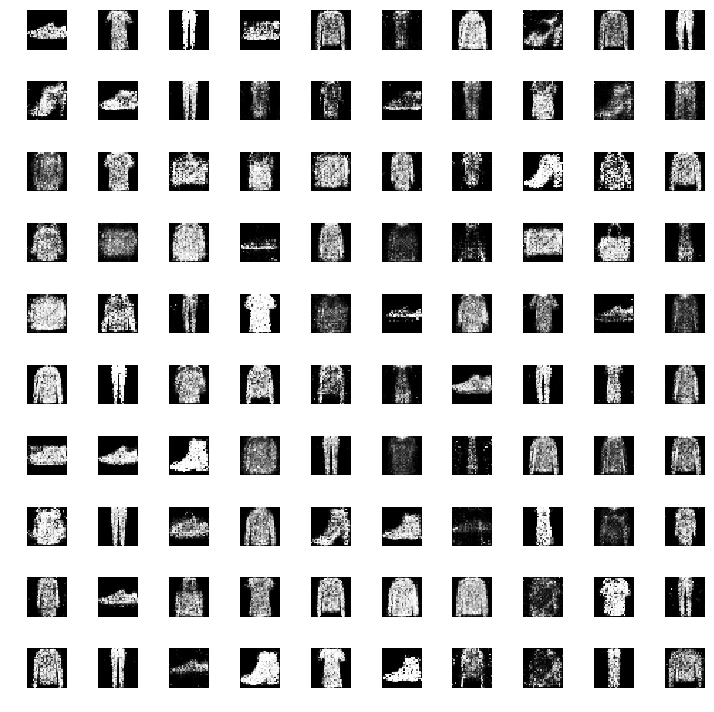

Epochs 37 D loss 160.0311 G loss 211.9113
Epochs 38 D loss 160.0654 G loss 211.3863
Epochs 39 D loss 159.7919 G loss 212.1216
Epochs 40 D loss 159.9863 G loss 210.3098
Epochs 41 D loss 159.8867 G loss 210.0145


<Figure size 432x288 with 0 Axes>

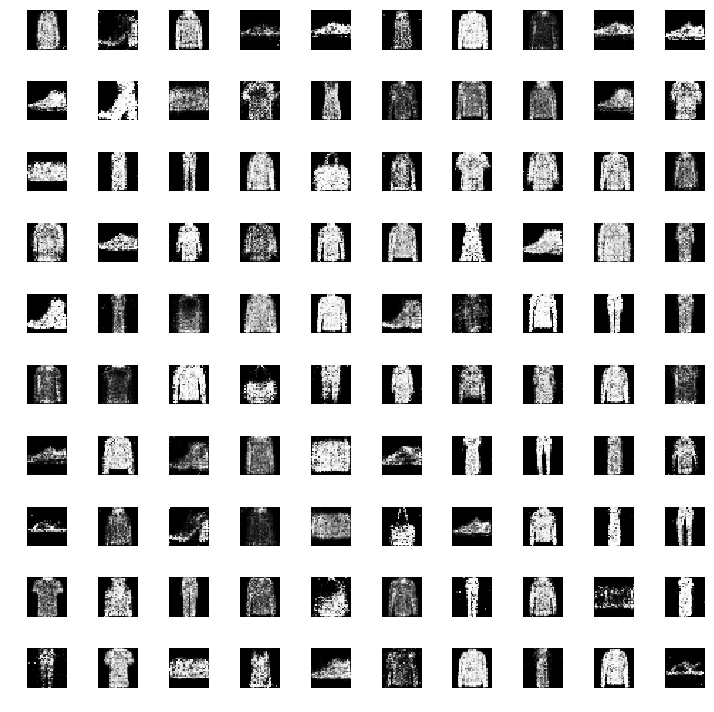

Epochs 42 D loss 160.2138 G loss 210.7396
Epochs 43 D loss 159.9325 G loss 211.1157
Epochs 44 D loss 160.1135 G loss 210.6022
Epochs 45 D loss 160.0597 G loss 210.3494
Epochs 46 D loss 160.1368 G loss 210.3873


<Figure size 432x288 with 0 Axes>

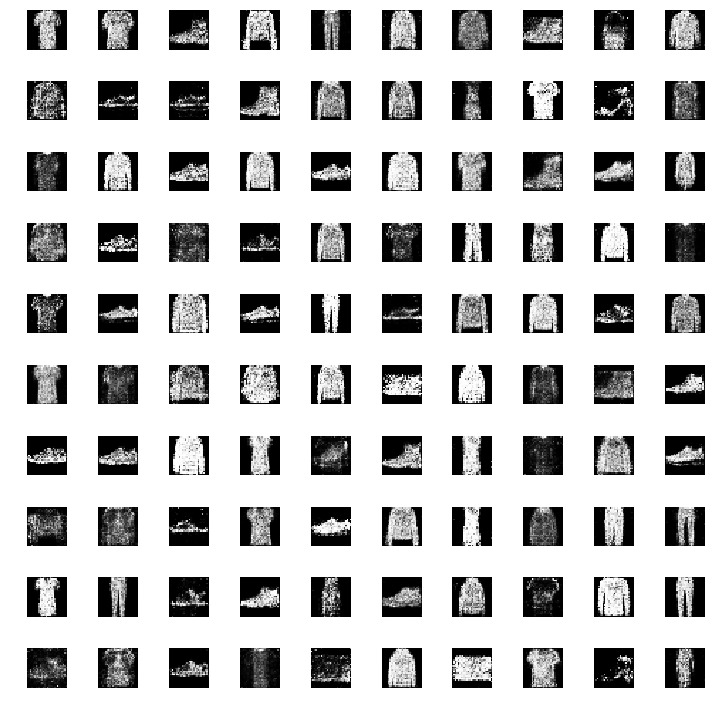

Epochs 47 D loss 159.9866 G loss 210.0357
Epochs 48 D loss 160.0266 G loss 211.2068
Epochs 49 D loss 160.0215 G loss 209.7852
Epochs 50 D loss 160.0214 G loss 210.0040
Epochs 51 D loss 160.1226 G loss 210.6530


<Figure size 432x288 with 0 Axes>

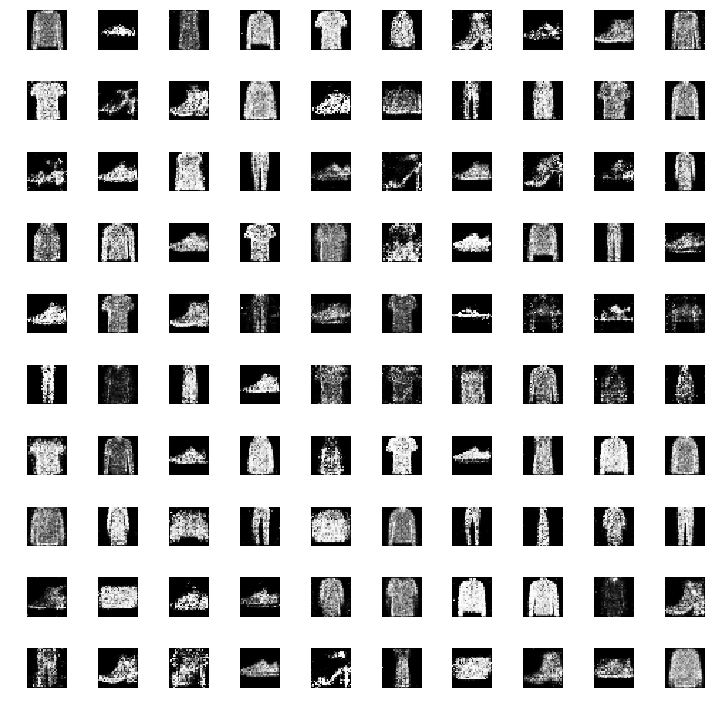

Epochs 52 D loss 159.9813 G loss 210.2860
Epochs 53 D loss 160.1714 G loss 209.2110
Epochs 54 D loss 159.9928 G loss 210.0279
Epochs 55 D loss 160.2043 G loss 208.6330
Epochs 56 D loss 159.6651 G loss 211.0707


<Figure size 432x288 with 0 Axes>

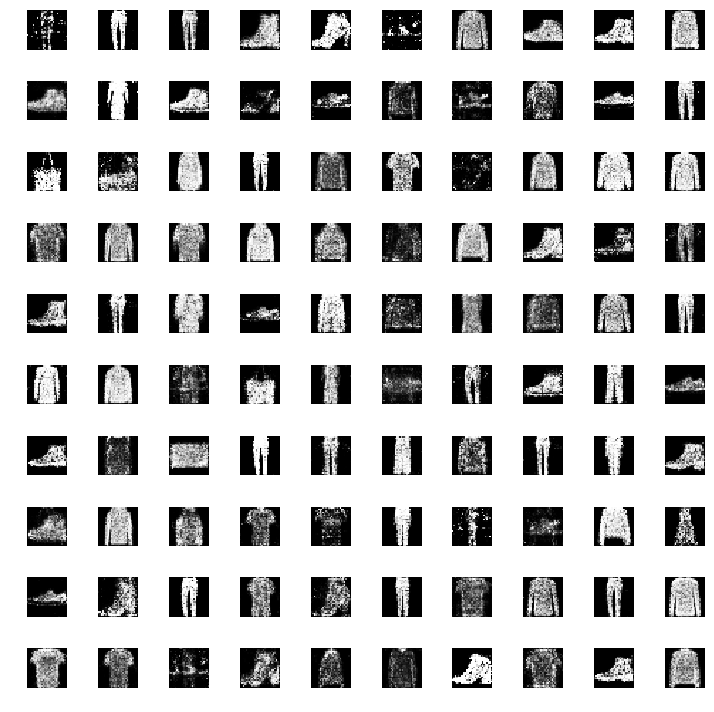

Epochs 57 D loss 160.2253 G loss 208.1577
Epochs 58 D loss 159.8180 G loss 210.7192
Epochs 59 D loss 160.1038 G loss 209.1796
Epochs 60 D loss 159.8201 G loss 209.1871


<Figure size 432x288 with 0 Axes>

In [25]:
g_losses = []
d_losses = []

### training loop
for epoch in range(EPOCHS):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  
  # Mini Batch
  for step in range(NO_OF_BATCHES):
    idx = np.random.randint(0, X_Train.shape[0], HALF_BATCH_SIZE)
    real_imgs = X_Train[idx]
    
    # generate fake image assuming generator is frozen
    noise = np.random.normal(0, 1, size=(HALF_BATCH_SIZE, NOISE_DIM))
    fake_imgs = generator.predict(noise)
    
    # lables
    real_y = np.ones((HALF_BATCH_SIZE, 1))*0.9
    fake_y = np.zeros((HALF_BATCH_SIZE, 1))
    
    # Train on Real and Fake Images
    d_real_loss = discriminator.train_on_batch(real_imgs, real_y)
    d_fake_loss = discriminator.train_on_batch(fake_imgs, fake_y)
    
    d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
    epoch_d_loss += d_loss
    
    
    # Train Generator
    noise = np.random.normal(0, 1, size = (BATCH_SIZE, NOISE_DIM))
    real_y = np.ones((BATCH_SIZE, 1))
    g_loss = model.train_on_batch(noise,real_y)
    
    epoch_g_loss += g_loss
 

  print('Epochs %d D loss %.4f G loss %.4f'%(epoch + 1, epoch_d_loss, epoch_g_loss))
  if (epoch%5) == 0:
    generator.save('models/gen_{0}.h5'.format(epoch))
    showImage(epoch)